In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


epoch,trn_loss,val_loss,trn_acc,val_acc,time,remain
1,3.864866,3.730545,0.031250,0.015625,0:00:00.40,0:00:07.63
2,3.708312,3.704665,0.041667,0.054688,0:00:00.40,0:00:07.22
3,3.654943,3.336118,0.048958,0.156250,0:00:00.38,0:00:06.46
4,3.206449,2.679714,0.142708,0.187500,0:00:00.42,0:00:06.83
5,2.369012,2.073646,0.288542,0.359375,0:00:00.40,0:00:06.05
6,1.658162,1.609706,0.450000,0.406250,0:00:00.38,0:00:05.30
7,1.276675,1.265242,0.592708,0.632812,0:00:00.41,0:00:05.50
8,0.697408,1.035744,0.735417,0.679688,0:00:00.41,0:00:05.09
9,0.631069,0.954556,0.773958,0.679688,0:00:00.41,0:00:04.63
10,0.418376,1.361569,0.842708,0.687500,0:00:00.43,0:00:04.69


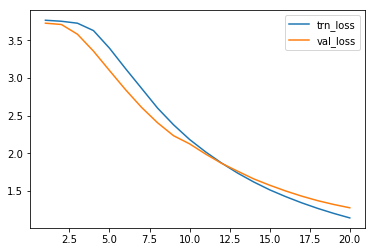

In [23]:
from torchwisdom.metrics.callback import *
from torchwisdom.optim.callback import *
from torchwisdom.metrics import *
from torchwisdom.callback import *
from torchwisdom.statemgr.callback import StateManagerCallback
from torchwisdom.utils.data.collector import *
from torch.optim.optimizer import Optimizer
from torchwisdom.trainer import *
from torchwisdom.vision.trainer.trainer import *

from torchwisdom.vision.models import mobilenetv2
from torchwisdom.vision.trainer.trainer import *
from torchvision.datasets.mnist import MNIST
import torchvision.transforms as transforms
from torchwisdom.utils.data.collector import DatasetCollector
import torch.optim as optim
import torch.nn as nn
from torchwisdom.vision.trainer.trainer import ConvTrainer
from torchwisdom.vision.models.simplecnn import SimpleCNN
from torchvision import datasets
from torchwisdom.metrics.callback import *


tmft = transforms.Compose([
    transforms.Resize((32,32)),
    transforms.Grayscale(),
    transforms.ToTensor()
])

# train_path = '/data/MNIST/train'
# valid_path = '/data/MNIST/valid'
# trainset = MNIST(train_path, train=True, transform=tmft, download=False)
# validset = MNIST(valid_path, train=False, transform=tmft, download=False)


train_path = '/data/att_faces_new/train'
valid_path = '/data/att_faces_new/valid'
trainset = datasets.ImageFolder(train_path, transform=tmft)
validset = datasets.ImageFolder(valid_path, transform=tmft)

 
data = DatasetCollector(trainset, validset)
model = SimpleCNN(in_chan=1, num_classes=40)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam
scheduler = StepLRCallback(step_size=30)
metric_acc = AccuracyCallback()
trainer = ConvTrainer(data=data, model=model, optimizer=optimizer, criterion=criterion, metrics=[metric_acc], callbacks=[scheduler])
trainer.fit(20, lr=0.01)

epoch,trn_loss,val_loss,trn_acc,val_acc,time,remain
1,3.942477,4.004533,0.015625,0.015625,0:00:00.35,0:00:01.43
2,3.874200,3.746153,0.015625,0.015625,0:00:00.41,0:00:01.31
3,3.697941,3.762195,0.039583,0.015625,0:00:00.36,0:00:00.68
4,3.696417,3.652946,0.053125,0.031250,0:00:00.36,0:00:00.30
5,3.631127,3.548510,0.042708,0.117188,0:00:00.38,0:00:00.03


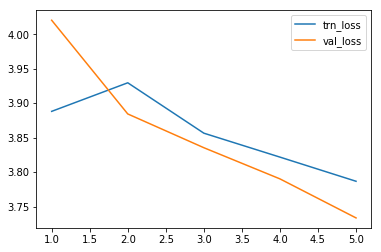

In [29]:
data = DatasetCollector(trainset, validset)
model = SimpleCNN(in_chan=1, num_classes=40)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam
scheduler = StepLRCallback(step_size=30)
metric_acc = AccuracyCallback()
trainer = ConvTrainer(data=data, model=model, optimizer=optimizer, criterion=criterion, metrics=[metric_acc], callbacks=[scheduler])
trainer.fit(5, lr=[0.001, 0.005, 0.01])

epoch,trn_loss,val_loss,trn_acc,val_acc,time,remain
1,0.002173,0.343727,1.000000,0.914062,0:00:00.34,0:00:01.37
2,0.002031,0.317125,1.000000,0.914062,0:00:00.46,0:00:01.51
3,0.001985,0.354091,1.000000,0.914062,0:00:00.42,0:00:00.89
4,0.001897,0.352873,1.000000,0.914062,0:00:00.39,0:00:00.35
5,0.001939,0.550046,1.000000,0.867188,0:00:00.40,0:0


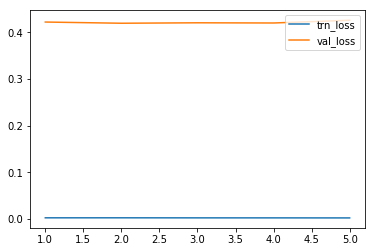

In [36]:
trainer.fit(5, lr=[0.0001, 0.005, 0.01])

In [17]:
import time
a = time.time()
time.sleep(10)
b = time.time()
c = b - a 

from datetime import timedelta
str(timedelta(seconds=c))

'0:00:10.010287'

In [5]:
trainer.state_manager.get_state('metric').data

{'classname': 'MetricState',
 'name': 'metric',
 'created': '2019-04-10 09:41:16.008698',
 'train': {'loss': {'val': [3.697492837905884,
    3.6918153762817383,
    3.7017388343811035,
    3.6922731399536133,
    3.671072006225586],
   'mean': [3.697492837905884,
    3.6946539878845215,
    3.6970157623291016,
    3.6958301067352295,
    3.690878391265869],
   'std': [nan,
    0.004014571662992239,
    0.004978906828910112,
    0.004706301260739565,
    0.011798477731645107],
   'epoch': []},
  'acc': {'val': [0.046875, 0.015625, 0.03125, 0.015625, 0.0],
   'mean': [0.046875, 0.03125, 0.03125, 0.02734375, 0.02187499962747097],
   'std': [nan,
    0.022097086533904076,
    0.015625,
    0.014959798194468021,
    0.01781524159014225],
   'epoch': []}},
 'valid': {'loss': {'val': [3.6974990367889404, 3.6793951988220215],
   'mean': [3.691981554031372, 3.690183639526367],
   'std': [0.010893513448536396, 0.011023728176951408],
   'epoch': []},
  'acc': {'val': [0.03125, 0.0],
   'mean': [0

In [12]:
torch.Tensor(64,40).argmax(dim=1).shape

torch.Size([64])

In [22]:
params = model.parameters()
param_groups = list(params)
if not isinstance(param_groups[0], dict):
    param_groups = [{'params': param_groups}]


In [25]:
model

SimpleCNN(
  (feature): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1))
  )
  (classifer): Linear(in_features=128, out_features=40, bias=True)
)

In [37]:
import torch.nn as nn

class ParameterModule(nn.Module):
    "Register a lone parameter `p` in a module."
    def __init__(self, p:nn.Parameter):
        super().__init__()
        self.val = p
    
    def forward(self, x): return x
    
def children(m:nn.Module)->nn.ModuleList:
    "Get children of `m`."
    return list(m.children())

def num_children(m:nn.Module)->int:
    "Get number of children modules in `m`."
    return len(children(m))

def children_and_parameters(m:nn.Module):
    "Return the children of `m` and its direct parameters not registered in modules."
    children = list(m.children())
    children_p = sum([[id(p) for p in c.parameters()] for c in m.children()],[])
    for p in m.parameters():
        if id(p) not in children_p: children.append(ParameterModule(p))
    return children

flatten_model = lambda m: sum(map(flatten_model,children_and_parameters(m)),[]) if num_children(m) else [m]

In [40]:
# flatten_model(mobilenetv2())

In [47]:
conv = nn.Conv2d(1,1, kernel_size=3)
params = list(conv.parameters())
params

[Parameter containing:
 tensor([[[[ 0.1499, -0.1805,  0.0106],
           [-0.1447, -0.2285,  0.0038],
           [ 0.2069,  0.3150, -0.0139]]]], requires_grad=True),
 Parameter containing:
 tensor([0.2263], requires_grad=True)]

In [49]:
list(conv.named_parameters())

[('weight', Parameter containing:
  tensor([[[[ 0.1499, -0.1805,  0.0106],
            [-0.1447, -0.2285,  0.0038],
            [ 0.2069,  0.3150, -0.0139]]]], requires_grad=True)),
 ('bias', Parameter containing:
  tensor([0.2263], requires_grad=True))]

In [68]:
named_params = list(mobilenetv2().named_parameters())

In [73]:
ln = len(named_params)
print(ln)
name = named_params[0][0]
param = named_params[0][1]

158


158